In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

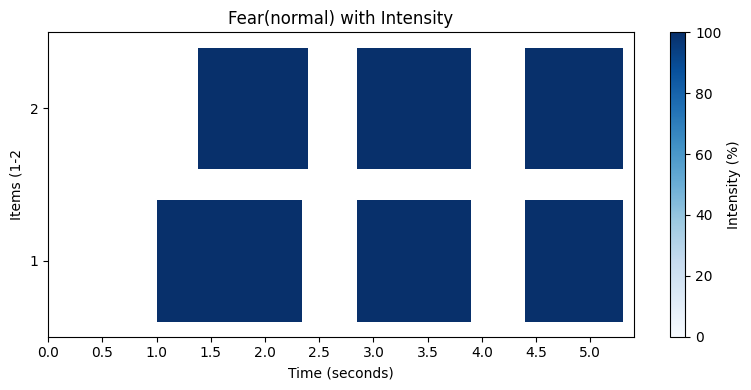

In [ ]:
# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 4))

# Data for the bars
x_labels = ['1', '2', '3', '4']
y_segments = {
    '1': [(1.0, 2.27),(2.30, 4.4)],
    '2': [(1.0, 2.46),(2.48, 3.1), (3.15, 3.64), (3.68, 4.4)],
    '3': [(1.00, 4.4)],
    '4': [(1.00, 4.4)]
}

# Intensity values for each item
intensity = {'1': 100, '2': 100}

# Create a colormap and normalize intensity values
cmap = plt.cm.Blues  # Using 'viridis' colormap
norm = Normalize(vmin=0, vmax=100)  # Intensity ranges from 0 to 100

# Plot the bars
for label, segments in y_segments.items():
    for start, end in segments:
        ax.barh(
            label, end - start, left=start,
            color=cmap(norm(intensity[label]))  # Map intensity to color
        )

# Add colorbar to show the intensity scale
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Required for adding colorbar
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Intensity (%)")

# Set x and y axis limits
ax.set_xlim(0, 4.5)
ax.set_ylim(-0.5, len(x_labels) - 0.5)

# Add grid and labels
plt.xticks(np.arange(0, 4.51, 0.5))
ax.set_yticks(range(len(x_labels)))
ax.set_yticklabels(x_labels)
ax.set_xlabel("Time (seconds)")
ax.set_ylabel("Items (1-4)")

# Display the plot
plt.title("Painful(KSL) with Intensity")  # Sadness(KSL), Anger(KSL), Disgust(KSL), Amusement(KSL), Surprised(KSL), Fear(KSL)
plt.tight_layout()
plt.show()

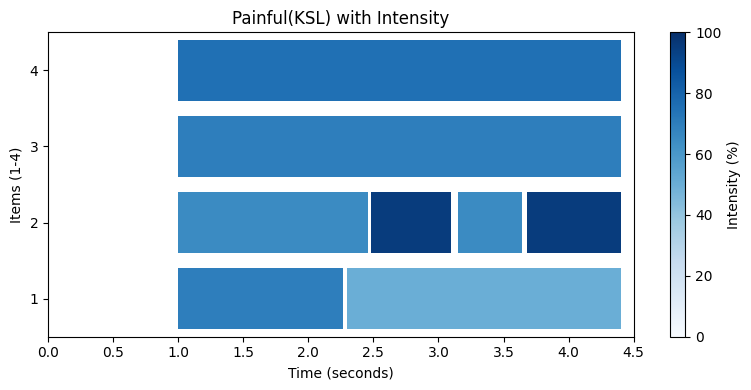

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

fig, ax = plt.subplots(figsize=(8, 4))

# Data for the bars with intensity values for each segment
y_segments = {
    '1': [(1.05, 3.45, 100)],
    '2': [(1.9, 3.4, 80)]
}

# Create a colormap and normalize intensity values
cmap = plt.cm.Blues  # Using 'Blues' colormap
norm = Normalize(vmin=0, vmax=100)  # Intensity ranges from 0 to 100

# Plot the bars
for label, segments in y_segments.items():
    for start, end, intensity in segments:
        ax.barh(
            label, end - start, left=start,
            color=cmap(norm(intensity))  # Map intensity to color
        )

# Add colorbar to show the intensity scale
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Required for adding colorbar
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Intensity (%)")

# Set x and y axis limits
ax.set_xlim(0, 3.5)
ax.set_ylim(-0.5, len(y_segments) - 0.5)

# Add grid and labels
plt.xticks(np.arange(0, 3.51, 0.5))
ax.set_yticks(range(len(y_segments)))
ax.set_yticklabels(list(y_segments.keys()))
ax.set_xlabel("Time (seconds)")
ax.set_ylabel("Items (1-2)")

# Display the plot
plt.title("Painful(normal) with Intensity")  # Sadness(KSL), Anger(KSL), Disgust(KSL), Amusement(KSL), Surprised(KSL), Fear(KSL)
plt.tight_layout()
plt.show()